# London: Demographic Custering vs Clustering by Venues

#### GitHub location: https://github.com/tbertoglia-ds/Coursera_Capstone/blob/master/London%20UK%20Boroughs%20Clustering%202.ipynb

#      
#      
# //////////////////////////////    Borrougs & Coordinates Dataset    //////////////////////////////
#      
#      

### 1. Import necessary Libraries

In [316]:
# Import Libraries

!pip install geopy

!pip install folium

!pip install geocoder

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import urllib.request

from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


### 2. Download and Explore Demographic Data

In [317]:
#Specify URL
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'

In [318]:
#Open the url
page = urllib.request.urlopen(url).read().decode('utf-8-sig', errors="replace")

In [319]:
#Parse the HTML from our URL
soup = BeautifulSoup(page,'lxml')

In [320]:
#Explore Tables
all_tables=soup.find_all("table")
all_tables

[<table class="wikitable sortable" style="font-size:100%" width="100%">
 <tbody><tr>
 <th>Borough
 </th>
 <th>Inner
 </th>
 <th>Status
 </th>
 <th>Local authority
 </th>
 <th>Political control
 </th>
 <th>Headquarters
 </th>
 <th>Area (sq mi)
 </th>
 <th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
 </th>
 <th>Co-ordinates
 </th>
 <th><span style="background:#67BCD3"> Nr. in map </span>
 </th></tr>
 <tr>
 <td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
 </td>
 <td>
 </td>
 <td>
 </td>
 <td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
 </td>
 <td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
 </td>
 <td><a href="/wiki/Barking_Town_Hall" 

In [321]:
#Explore 'wikitable sortable'
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Hal

### 3. Arrange and create Dataset

In [322]:
# Loop through the rows
A=[]
B=[]


for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells) > 0:
        A.append(cells[0].text.strip())
        B.append(cells[8].text.strip()) 
   

In [323]:
#Create Dataframe
df_pre=pd.DataFrame(A,columns=['Borough'])
df_pre['Co-ordinates']=B
print(df_pre.shape)
df_pre.head()

(32, 2)


,Borough,Co-ordinates
0,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


### 4. After checkig the data, I decided to extract all location & Neighborhood data from third column
#### I will create 3 strings and will join them afterwards in an new dataset.

In [324]:
s = df_pre['Co-ordinates'].str.split(" / ", expand=True)
s.head()

,0,1,2
0,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [325]:
s2 = s[2]
s2.head()

0    51.5607; 0.1557﻿ (Barking and Dagenham)
1                 51.6252; -0.1517﻿ (Barnet)
2                  51.4549; 0.1505﻿ (Bexley)
3                  51.5588; -0.2817﻿ (Brent)
4                 51.4039; 0.0198﻿ (Bromley)
Name: 2, dtype: object

In [326]:
s3 = s2.str.split("; ", expand=True)
s3.head()

,0,1
0,51.5607,0.1557﻿ (Barking and Dagenham)
1,51.6252,-0.1517﻿ (Barnet)
2,51.4549,0.1505﻿ (Bexley)
3,51.5588,-0.2817﻿ (Brent)
4,51.4039,0.0198﻿ (Bromley)


#### Latitude ready

In [327]:
lat = s3[0]
lat = lat.apply(pd.to_numeric, errors='coerce')
lat.head()

0    51.5607
1    51.6252
2    51.4549
3    51.5588
4    51.4039
Name: 0, dtype: float64

In [328]:
s4 = s3[1].str.split('(', expand=True)
s4.head()

,0,1
0,0.1557﻿,Barking and Dagenham)
1,-0.1517﻿,Barnet)
2,0.1505﻿,Bexley)
3,-0.2817﻿,Brent)
4,0.0198﻿,Bromley)


In [329]:
s4_pre = s4[0]
s4_pre.head()

0     0.1557﻿ 
1    -0.1517﻿ 
2     0.1505﻿ 
3    -0.2817﻿ 
4     0.0198﻿ 
Name: 0, dtype: object

In [330]:
s4_pre2 =  s4_pre.str.split('\ufeff', expand=True)
s4_pre2.head()

,0,1
0,0.1557,
1,-0.1517,
2,0.1505,
3,-0.2817,
4,0.0198,


In [331]:
lon = s4_pre2[0]
lon.head()

0     0.1557
1    -0.1517
2     0.1505
3    -0.2817
4     0.0198
Name: 0, dtype: object

#### Longitude ready

In [332]:
lon = lon.apply(pd.to_numeric, errors='coerce')
lon.head()

0    0.1557
1   -0.1517
2    0.1505
3   -0.2817
4    0.0198
Name: 0, dtype: float64

In [333]:
s5 = s4[1]
s5.head()

0    Barking and Dagenham)
1                  Barnet)
2                  Bexley)
3                   Brent)
4                 Bromley)
Name: 1, dtype: object

In [334]:
#Since strings are immutables, we separate the column with the "("
s6 = s5.str.split(")", expand=True)
s6.head()

,0,1
0,Barking and Dagenham,
1,Barnet,
2,Bexley,
3,Brent,
4,Bromley,


#### Borrough ready

In [335]:
bor = s6[0]
bor.head()

0    Barking and Dagenham
1                  Barnet
2                  Bexley
3                   Brent
4                 Bromley
Name: 0, dtype: object

### 5. Let's create our Borrough & Location Dataframe

In [336]:
df = pd.DataFrame() 

In [337]:
df['Borough'] = bor

In [338]:
df['Latitude'] = lat

In [339]:
df['Longitude'] = lon

In [340]:
print(df.shape)
df.head()

(32, 3)


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [341]:
#Trim Dataset

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [342]:
print(df.shape)
print(df.dtypes)
df.head()

(32, 3)
Borough       object
Latitude     float64
Longitude    float64
dtype: object


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


#      
#      
# ///////////////////////////////     Demographic Clustering     //////////////////////////////
#      
#      

### 6. Now we collect demographic data from the official source

In [343]:
#https://data.london.gov.uk/dataset/london-borough-profiles
df_dem_pre = pd.read_csv('https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv', header = 0, encoding= 'unicode_escape')
df_dem_pre.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",Net_internal_migration_(2015),Net_international_migration_(2015),Net_natural_change_(2015),%_of_resident_population_born_abroad_(2015),Largest_migrant_population_by_country_of_birth_(2011),%_of_largest_migrant_population_(2011),Second_largest_migrant_population_by_country_of_birth_(2011),%_of_second_largest_migrant_population_(2011),Third_largest_migrant_population_by_country_of_birth_(2011),%_of_third_largest_migrant_population_(2011),%_of_population_from_BAME_groups_(2016),%_people_aged_3+_whose_main_language_is_not_English_(2011_Census),"Overseas_nationals_entering_the_UK_(NINo),_(2015/16)","New_migrant_(NINo)_rates,_(2015/16)",Largest_migrant_population_arrived_during_2015/16,Second_largest_migrant_population_arrived_during_2015/16,Third_largest_migrant_population_arrived_during_2015/16,Employment_rate_(%)_(2015),Male_employment_rate_(2015),Female_employment_rate_(2015),Unemployment_rate_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014),Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016),%_working-age_with_a_disability_(2015),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Gross_Annual_Pay,_(2016)",Gross_Annual_Pay_-_Male_(2016),Gross_Annual_Pay_-_Female_(2016),Modelled_Household_median_income_estimates_2012/13,%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13),Number_of_jobs_by_workplace_(2014),%_of_employment_that_is_in_public_sector_(2014),"Jobs_Density,_2015","Number_of_active_businesses,_2015",Two-year_business_survival_rates_(started_in_2013),Crime_rates_per_thousand_population_2014/15,Fires_per_thousand_population_(2014),Ambulance_incidents_per_hundred_population_(2014),"Median_House_Price,_2015","Average_Band_D_Council_Tax_charge_(£),_2015/16",New_Homes_(net)_2015/16_(provisional),"Homes_Owned_outright,_(2014)_%","Being_bought_with_mortgage_or_loan,_(2014)_%","Rented_from_Local_Authority_or_Housing_Association,_(2014)_%","Rented_from_Private_landlord,_(2014)_%","%_of_area_that_is_Greenspace,_2005",Total_carbon_emissions_(2014),"Household_Waste_Recycling_Rate,_2014/15","Number_of_cars,_(2011_Census)","Number_of_cars_per_household,_(2011_Census)","%_of_adults_who_cycle_at_least_once_per_month,_2014/15","Average_Public_Transport_Accessibility_score,_2014","Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14",Rates_of_Children_Looked_After_(2016),%_of_pupils_whose_first_language_is_not_English_(2015),%_children_living_in_out-of-work_households_(2015),"Male_life_expectancy,_(2012-14)","Female_life_expectancy,_(2012-14)",Teenage_conception_rate_(2014),Life_satisfaction_score_2011-14_(out_of_10),Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,-7,665,30,.,United States,2.8,France,2,Australia,1.9,27.5,17.1,975,152.2,India,France,United States,64.6,.,.,.,1.6,.,3.4,.,.,.,.,.,.,"£63,620",.,500400,3.4,84.3,26130,64.3,.,12.3,.,799999,931.2,80,.,.,.,.,4.8,1036,34.4,1692,0.4,16.9,7.9,78.6,101,.,7.9,.,.,.,6.6,7.1,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,

#### Now I will create a subset with the Key Deographic Features I wwant to use for clustering

In [344]:
df_dem = df_dem_pre.iloc[1:33,[1, 3, 6, 7, 28, 48, 51, 41]]  
df_dem.head()

,Area_name,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
1,Barking and Dagenham,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,Barnet,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Bexley,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Brent,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,Bromley,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


In [345]:
#Trim Dataset

df_dem = df_dem.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [346]:
df_dem.rename(columns={'Area_name': 'Borough', 
                       'GLA_Population_Estimate_2017': 'Population',
                       'Population_density_(per_hectare)_2017': 'Population Density',
                       'Average_Age,_2017': 'Average Age',
                       'Employment_rate_(%)_(2015)': 'Employment Rate (%)',
                       'Crime_rates_per_thousand_population_2014/15': 'Crime Rate',
                       'Median_House_Price,_2015': 'House Price',
                       'Modelled_Household_median_income_estimates_2012/13': 'Median Income'}, inplace=True)
df_dem_top = df_dem
print(df_dem.shape)
df_dem.head()

(32, 8)


,Borough,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
1,Barking and Dagenham,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,Barnet,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Bexley,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Brent,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,Bromley,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


### 7. Clean & prepare Dataset

Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [347]:
df_dem_clusterset_pre = df_dem.drop('Borough', 1)
df_dem_clusterset_pre.head()

,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
1,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


#### Format and add 'Modelled_Household_median_income_estimates_2012/13'

In [348]:
df_incc = df_dem_clusterset_pre['Median Income']
df_incc = df_incc.str.split("£", expand=True)
df_incc = df_incc.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_incc = df_incc[1]
#df_incc = df_incc.str.split(",", expand=True)
df_incc = df_incc.str.split(",", expand=True)
df_incc[2] =  df_incc[0] + df_incc[1]
df_incc = df_incc[2]
df_incc = df_incc.apply(pd.to_numeric, errors='coerce')
df_incc

1     29420
2     40530
3     36990
4     32140
5     43060
6     43750
7     37000
8     36070
9     33110
10    35350
11    35140
12    43820
13    35420
14    38880
15    36670
16    37040
17    35330
18    39790
19    55620
20    43940
21    38490
22    35900
23    41960
24    28780
25    36860
26    53470
27    37100
28    39940
29    34930
30    33080
31    47480
32    47510
Name: 2, dtype: int64

In [349]:
df_dem_clusterset_pre['Median Income'] = df_incc
df_dem_clusterset_pre.head()

,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
1,209000,57.9,32.9,65.8,83.4,243500,29420
2,389600,44.9,37.3,68.5,62.7,445000,40530
3,244300,40.3,39.0,75.1,51.8,275000,36990
4,332100,76.8,35.6,69.5,78.8,407250,32140
5,327900,21.8,40.2,75.3,64.1,374975,43060


### 8. Analyze Correlations

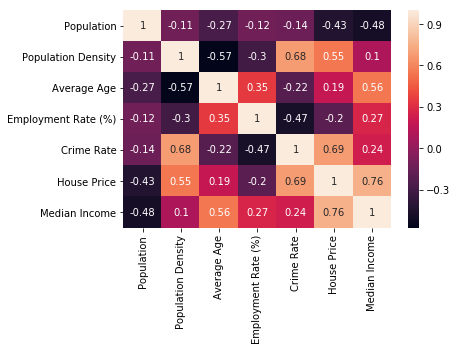

In [350]:
import seaborn as sn
import matplotlib.pyplot as plt
df_dem_clusterset_numeric = df_dem_clusterset_pre.apply(pd.to_numeric, errors='coerce')
corrMatrix = df_dem_clusterset_numeric.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### There seems to be a high correlation between Median_House_Price,_2015 and 3 other Features, the Feature will be excluded and the resulting Dataset tested again for correlations.

In [351]:
df_dem_clusterset_pre2 = df_dem_clusterset_pre.loc[:,df_dem_clusterset_pre.columns[[0,1,2,3,4,6]]]
df_dem_clusterset_pre2.head()

,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,Median Income
1,209000,57.9,32.9,65.8,83.4,29420
2,389600,44.9,37.3,68.5,62.7,40530
3,244300,40.3,39.0,75.1,51.8,36990
4,332100,76.8,35.6,69.5,78.8,32140
5,327900,21.8,40.2,75.3,64.1,43060


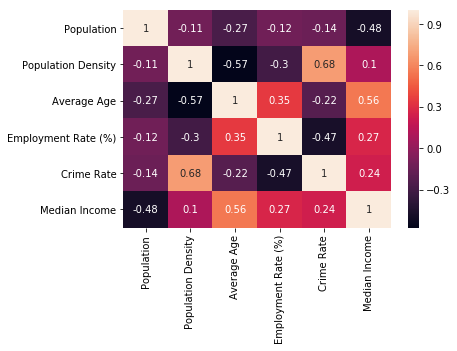

In [352]:
import seaborn as sn
import matplotlib.pyplot as plt
df_dem_clusterset_numeric = df_dem_clusterset_pre2.apply(pd.to_numeric, errors='coerce')
corrMatrix = df_dem_clusterset_numeric.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

#### The new dataset seems much more consistent with only 1 big corelation between 2 of their variables. We will keep it as it is for now.

### 9. Normalize Dataset for Clustering

In [353]:
from sklearn.preprocessing import StandardScaler

X = df_dem_clusterset_pre2.values[:,1:]
X = np.nan_to_num(X)
df_dem_clusterset = StandardScaler().fit_transform(X)
df_dem_clusterset

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-4.65378203e-01, -1.50670843e+00, -1.81033090e+00,
        -4.79371558e-02, -1.57543787e+00],
       [-8.02303598e-01,  5.25327460e-01, -1.12849747e+00,
        -7.23545071e-01,  2.72283146e-01],
       [-9.21523354e-01,  1.31043224e+00,  5.38206484e-01,
        -1.07929996e+00, -3.16459644e-01],
       [ 2.44594879e-02, -2.59777316e-01, -8.75966564e-01,
        -1.98072248e-01, -1.12307053e+00],
       [-1.40099411e+00,  1.86462384e+00,  5.88712664e-01,
        -6.77851782e-01,  6.93051299e-01],
       [ 9.18607653e-01,  1.09683755e-01, -9.51725835e-01,
         1.26084919e+00,  8.07806249e-01],
       [-8.07487066e-01,  3.86779559e-01,  6.13965754e-01,
        -2.56820762e-01, -3.14796529e-01],
       [-3.25424577e-01,  1.73184877e-02, -6.78676798e-02,
        -3.05777858e-01, -4.69466245e-01],
       [-8.98197749e-01,  6.35011216e-02,  7.89159067e-03,
        -5.04870045e-01, -9.61748352e-01],
       [-4.31685663e-01, -5.36873119e-01, -2.19386221e-01,
        -1.78489410e-01

### 10. We proceed clustering the Boroughs according to their Demographic charcteristics

In [354]:
# set number of clusters
kclusters = 5

#df_dem_clustering = df_dem.drop('Borough', 1)

# run k-means clustering
kmeans_dem = KMeans(n_clusters=kclusters, random_state=0).fit(df_dem_clusterset)

# check cluster labels generated for each row in the dataframe
kmeans_dem.labels_[0:10] 

array([2, 1, 3, 1, 3, 0, 1, 1, 1, 1], dtype=int32)

### 11. Now we join the Location with the Demographic Dataset

In [355]:
# add clustering labels
df_dem.insert(0, 'Cluster Labels', kmeans_dem.labels_)

london_merged = df

london_merged.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [356]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(df_dem.set_index('Borough'), on='Borough')

london_merged.head() # check the last columns!

,Borough,Latitude,Longitude,Cluster Labels,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
0,Barking and Dagenham,51.5607,0.1557,2,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
1,Barnet,51.6252,-0.1517,1,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
2,Bexley,51.4549,0.1505,3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
3,Brent,51.5588,-0.2817,1,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
4,Bromley,51.4039,0.0198,3,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


### 12. We are now ready to map the demographic's clustering result

In [357]:
address = 'London'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [358]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [359]:
# create map of London & Clustered Neighborhoods
import folium
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 13. Examine Clusters

In [360]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
5,Camden,0,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
11,Hammersmith and Fulham,0,185300,113,35.7,77.5,113.2,730000,"£43,820"
17,Islington,0,231200,155.6,34.8,72.6,121.2,583000,"£39,790"
20,Lambeth,0,328900,122.7,34.5,78.5,104.6,450000,"£38,490"
26,Southwark,0,314300,108.9,34.4,74.2,100.6,475000,"£37,100"
30,Wandsworth,0,321000,93.7,35.0,78.8,72.6,557000,"£47,480"


In [361]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
1,Barnet,1,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Brent,1,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
6,Croydon,1,386500,44.7,37.0,75.4,77,300000,"£37,000"
7,Ealing,1,351600,63.3,36.2,72.7,75.5,430000,"£36,070"
8,Enfield,1,333000,41.2,36.3,73.0,69.4,320000,"£33,110"
9,Greenwich,1,280100,59.2,35.0,72.1,79.4,340000,"£35,350"
12,Haringey,1,278000,93.9,35.1,71.3,90.2,432500,"£35,420"
15,Hillingdon,1,301000,26,36.4,73.2,76.6,350000,"£37,040"
16,Hounslow,1,274200,49,35.8,74.2,79.2,355000,"£35,330"
21,Lewisham,1,303400,86.3,35.0,75.9,77,352000,"£35,900"


In [362]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
0,Barking and Dagenham,2,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
10,Hackney,2,274300,144,33.1,69.0,99.6,485000,"£35,140"
23,Newham,2,342900,94.7,32.1,66.2,90.8,305000,"£28,780"
28,Tower Hamlets,2,304000,153.7,31.4,70.4,99.9,415000,"£34,930"


In [363]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
2,Bexley,3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Bromley,3,327900,21.8,40.2,75.3,64.1,374975,"£43,060"
13,Harrow,3,252300,50,38.3,73.9,50.4,396150,"£38,880"
14,Havering,3,254300,22.6,40.3,76.5,62.9,287500,"£36,670"
19,Kingston upon Thames,3,175400,47.1,37.1,74.4,58.5,410000,"£43,940"
22,Merton,3,208100,55.3,36.7,78.8,59.7,415000,"£41,960"
25,Richmond upon Thames,3,197300,34.4,38.8,79.6,56.3,575000,"£53,470"
27,Sutton,3,202600,46.2,38.9,78.2,55.9,320000,"£39,940"


In [364]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
18,Kensington and Chelsea,4,159000,131.1,39.3,68.2,120.9,1200000,"£55,620"
31,Westminster,4,242100,112.7,37.7,65.6,212.4,920000,"£47,510"


#### The clusters 0 & 4 seem idoneous to fulfill the objectives of the stakeholder in terms of customer profile.

#      
#      
# //////////////////////////////     Clustering by Venues    //////////////////////////////
#      
#      

### 12. Foursquare Keys

In [365]:
# The code was removed by Watson Studio for sharing.

### 13. Explore London's Neighborhoods

In [366]:
radius = 500
LIMIT = 100

In [367]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [368]:
# type your answer here

london_venues = getNearbyVenues(names=london_merged['Borough'],
                                   latitudes=london_merged['Latitude'],
                                   longitudes=london_merged['Longitude']
                               )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [369]:
print(london_venues.shape)
london_venues.head()

(1441, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket


In [370]:
london_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Barking and Dagenham,7,7,7,7,7,7
Barnet,4,4,4,4,4,4
Bexley,29,29,29,29,29,29
Brent,75,75,75,75,75,75
Bromley,39,39,39,39,39,39
Camden,71,71,71,71,71,71
Croydon,38,38,38,38,38,38
Ealing,71,71,71,71,71,71
Enfield,56,56,56,56,56,56


In [371]:
uv = np.unique(london_venues['Venue'])
uv

array(['"Out of Order" David Mach Sculpture (Phoneboxes)',
       '1Rebel Victoria', '41 Hotel', ..., 'truGym', 'wagamama', 'wilko'],
      dtype=object)

In [372]:
print('There are {} uniques categories'.format(len(london_venues['Venue Category'].unique())) + 
      ' and {} uniques Venues.'.format(len(london_venues['Venue'].unique())))

There are 212 uniques categories and 1044 uniques Venues.


### 14. Neighborhoods Analysis

In [373]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head(100)

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Barkin

In [374]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [375]:
london_grouped_sum = london_onehot.groupby('Borough').sum().reset_index()
london_grouped_sum

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Baby Store,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bexley,0,0,0,0,1,0,0

In [376]:
london_grouped.shape

(32, 213)

### 15. London's neighborhoods along with their top 5 most common venues

In [377]:
num_top_venues = 5

for Borough in london_grouped['Borough']:
    print("----"+Borough+"----")
    temp = london_grouped[london_grouped['Borough'] == Borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0                  Park  0.14
1  Gym / Fitness Center  0.14
2           Bus Station  0.14
3                  Pool  0.14
4           Supermarket  0.14


----Barnet----
                        venue  freq
0         Rental Car Location  0.25
1  Construction & Landscaping  0.25
2                    Bus Stop  0.25
3                        Café  0.25
4          African Restaurant  0.00


----Bexley----
            venue  freq
0             Pub  0.10
1  Clothing Store  0.10
2     Coffee Shop  0.10
3        Pharmacy  0.07
4     Supermarket  0.07


----Brent----
                 venue  freq
0                Hotel  0.09
1          Coffee Shop  0.09
2  Sporting Goods Shop  0.07
3                  Bar  0.07
4       Clothing Store  0.05


----Bromley----
                  venue  freq
0        Clothing Store  0.15
1           Coffee Shop  0.13
2          Burger Joint  0.05
3  Gym / Fitness Center  0.05
4           Pizza Place  0.05


----Cam

### 16. Build a Dataframe

In [378]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [379]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Golf Course,Bus Station,Supermarket,Park,Gym / Fitness Center,Martial Arts Dojo,Fish Market,Film Studio,Fast Food Restaurant
1,Barnet,Construction & Landscaping,Bus Stop,Rental Car Location,Café,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,Bexley,Pub,Coffee Shop,Clothing Store,Italian Restaurant,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Furniture / Home Store
3,Brent,Coffee Shop,Hotel,Sporting Goods Shop,Bar,Clothing Store,Indian Restaurant,Grocery Store,Italian Restaurant,Burger Joint,Food Court
4,Bromley,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Chocolate Shop,Electronics Store,Sushi Restaurant,Supermarket


### 17. Cluster Neighborhoods by venues

In [380]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans_venues = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_venues.labels_[0:10] 

array([4, 2, 3, 0, 3, 0, 0, 0, 3, 3], dtype=int32)

In [381]:
# add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans_venues.labels_)
borough_venues_sorted.head()


,Cluster Labels,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,4,Barking and Dagenham,Pool,Golf Course,Bus Station,Supermarket,Park,Gym / Fitness Center,Martial Arts Dojo,Fish Market,Film Studio,Fast Food Restaurant
1,2,Barnet,Construction & Landscaping,Bus Stop,Rental Car Location,Café,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,3,Bexley,Pub,Coffee Shop,Clothing Store,Italian Restaurant,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Furniture / Home Store
3,0,Brent,Coffee Shop,Hotel,Sporting Goods Shop,Bar,Clothing Store,Indian Restaurant,Grocery Store,Italian Restaurant,Burger Joint,Food Court
4,3,Bromley,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Chocolate Shop,Electronics Store,Sushi Restaurant,Supermarket


In [382]:
# merge london_grouped with london geographic data to add latitude/longitude for each neighborhood
london_merged_venue = df.join(borough_venues_sorted.set_index('Borough'), on='Borough')

london_merged_venue.head() 

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,0.1557,4,Pool,Golf Course,Bus Station,Supermarket,Park,Gym / Fitness Center,Martial Arts Dojo,Fish Market,Film Studio,Fast Food Restaurant
1,Barnet,51.6252,-0.1517,2,Construction & Landscaping,Bus Stop,Rental Car Location,Café,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,Bexley,51.4549,0.1505,3,Pub,Coffee Shop,Clothing Store,Italian Restaurant,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Furniture / Home Store
3,Brent,51.5588,-0.2817,0,Coffee Shop,Hotel,Sporting Goods Shop,Bar,Clothing Store,Indian Restaurant,Grocery Store,Italian Restaurant,Burger Joint,Food Court
4,Bromley,51.4039,0.0198,3,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Chocolate Shop,Electronics Store,Sushi Restaurant,Supermarket


In [383]:
london_merged_venue[['Cluster Labels']] = london_merged_venue[['Cluster Labels']].astype(int)

In [384]:
london_merged_venue.dtypes

Borough                    object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [385]:
london_merged_venue

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,0.1557,4,Pool,Golf Course,Bus Station,Supermarket,Park,Gym / Fitness Center,Martial Arts Dojo,Fish Market,Film Studio,Fast Food Restaurant
1,Barnet,51.6252,-0.1517,2,Construction & Landscaping,Bus Stop,Rental Car Location,Café,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio,Fast Food Restaurant
2,Bexley,51.4549,0.1505,3,Pub,Coffee Shop,Clothing Store,Italian Restaurant,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Furniture / Home Store
3,Brent,51.5588,-0.2817,0,Coffee Shop,Hotel,Sporting Goods Shop,Bar,Clothing Store,Indian Restaurant,Grocery Store,Italian Restaurant,Burger Joint,Food Court
4,Bromley,51.4039,0.0198,3,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Chocolate Shop,Electronics Store,Sushi Restaurant,Supermarket
5,Camden,51.5290,-0.1255,0,Café,Hotel,Coffee Shop,Pub,Burger Joint,Pizza Place,Deli / Bodega,Breakfast Spot,Train Station,Garden
6,Croydon,51.3714,-0.0977,0,Coffee Shop,Pub,Portuguese Restaurant,Burrito Place,Gaming Cafe,Bookstore,Malay Restaurant,Breakfast Spot,Park,Spanish Restaurant
7,Ealing,51.5130,-0.3089,0,Coffee Shop,Clothing Store,Italian Restaurant,Pub,Park,Bakery,Café,Hotel,Vietnamese Restaurant,Burger Joint
8,Enfield,51.6538,-0.0799,3,Clothing Store,Coffee Shop,Café,Pub,Shopping Mall,Optical Shop,Supermarket,Video Game Store,Gift Shop,Pharmacy
9,Greenwich,51.4892,0.0648,3,Pub,Fast Food Restaurant,Coffee Shop,Clothing Store,Hotel,Grocery Store,Plaza,Pharmacy,Supermarket,Bookstore


### 18. Map London's Clusters

In [386]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged_venue['Latitude'], london_merged_venue['Longitude'], london_merged_venue['Borough'], london_merged_venue['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 19. Examine Clusters

In [387]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 0, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,0,Coffee Shop,Hotel,Sporting Goods Shop,Bar,Clothing Store,Indian Restaurant,Grocery Store,Italian Restaurant,Burger Joint,Food Court
5,Camden,0,Café,Hotel,Coffee Shop,Pub,Burger Joint,Pizza Place,Deli / Bodega,Breakfast Spot,Train Station,Garden
6,Croydon,0,Coffee Shop,Pub,Portuguese Restaurant,Burrito Place,Gaming Cafe,Bookstore,Malay Restaurant,Breakfast Spot,Park,Spanish Restaurant
7,Ealing,0,Coffee Shop,Clothing Store,Italian Restaurant,Pub,Park,Bakery,Café,Hotel,Vietnamese Restaurant,Burger Joint
10,Hackney,0,Pub,Café,Coffee Shop,Bakery,Brewery,Grocery Store,Modern European Restaurant,Clothing Store,Cocktail Bar,Vegetarian / Vegan Restaurant
11,Hammersmith and Fulham,0,Pub,Café,Indian Restaurant,Coffee Shop,Italian Restaurant,Hotel,Thai Restaurant,Chinese Restaurant,Gastropub,Clothing Store
12,Haringey,0,Fast Food Restaurant,Park,Portuguese Restaurant,Gym / Fitness Center,Café,Movie Theater,Mediterranean Restaurant,Supermarket,Bar,Bus Stop
13,Harrow,0,Indie Movie Theater,Indian Restaurant,Coffee Shop,Supermarket,Platform,Grocery Store,Dumpling Restaurant,Flea Market,Fish Market,Film Studio
17,Islington,0,Pub,Burger Joint,Boutique,Mediterranean Restaurant,Theater,Bakery,Ice Cream Shop,Music Venue,Park,Spa
18,Kensington and Chelsea,0,Clothing Store,Café,Juice Bar,Bakery,Pub,Breakfast Spot,Italian Restaurant,Restaurant,Gym / Fitness Center,Hotel


In [388]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 1, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,1,Pizza Place,Café,Chinese Restaurant,Park,Yoga Studio,Electronics Store,Food Court,Flea Market,Fish Market,Film Studio


In [389]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 2, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,2,Construction & Landscaping,Bus Stop,Rental Car Location,Café,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio,Fast Food Restaurant


In [390]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 3, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,3,Pub,Coffee Shop,Clothing Store,Italian Restaurant,Fast Food Restaurant,Pharmacy,Supermarket,Portuguese Restaurant,Bakery,Furniture / Home Store
4,Bromley,3,Clothing Store,Coffee Shop,Pizza Place,Burger Joint,Gym / Fitness Center,Bookstore,Chocolate Shop,Electronics Store,Sushi Restaurant,Supermarket
8,Enfield,3,Clothing Store,Coffee Shop,Café,Pub,Shopping Mall,Optical Shop,Supermarket,Video Game Store,Gift Shop,Pharmacy
9,Greenwich,3,Pub,Fast Food Restaurant,Coffee Shop,Clothing Store,Hotel,Grocery Store,Plaza,Pharmacy,Supermarket,Bookstore
14,Havering,3,Coffee Shop,Clothing Store,Bakery,Shopping Mall,Hotel,Bookstore,Department Store,Café,Fast Food Restaurant,Pub
15,Hillingdon,3,Coffee Shop,Clothing Store,Italian Restaurant,Pharmacy,Gift Shop,Sandwich Place,Toy / Game Store,Bookstore,Fast Food Restaurant,Pizza Place
19,Kingston upon Thames,3,Coffee Shop,Café,Clothing Store,Pub,Italian Restaurant,Burger Joint,Fast Food Restaurant,Bakery,Department Store,Thai Restaurant
24,Redbridge,3,Clothing Store,Supermarket,Fast Food Restaurant,Department Store,Sandwich Place,Bakery,Grocery Store,Coffee Shop,Hotel,Irish Pub
27,Sutton,3,Clothing Store,Pub,Coffee Shop,Pizza Place,Café,Italian Restaurant,Sandwich Place,Department Store,Bar,Portuguese Restaurant
30,Wandsworth,3,Pub,Coffee Shop,Clothing Store,Pizza Place,Supermarket,Breakfast Spot,Asian Restaurant,Gym / Fitness Center,Indian Restaurant,Burger Joint


In [391]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 4, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,4,Pool,Golf Course,Bus Station,Supermarket,Park,Gym / Fitness Center,Martial Arts Dojo,Fish Market,Film Studio,Fast Food Restaurant


#### The Cluster 0 has a very intersting combination of Cafés and Hotel, this seems to be the optimal enviroment for our Coffee Shop chain.

#      
#      
# //////////////////////////////     Clustering Similitude Analysis    //////////////////////////////
#      
#      

### 20. Adjusted Rand Index (ARI)

The adjusted Rand index will present a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).\
In this case we will use the score to compare the Demographic Custering with the Clustering by Venues.

In [392]:
from sklearn.metrics.cluster import adjusted_rand_score

In [393]:
adjusted_rand_score(kmeans_venues.labels_, kmeans_dem.labels_)

-0.0217877094972067

### 21. Preliminary conclusion

A value very close to 0, provides little evidence to assume that there may be a relationship between the clustering results provided by demographic charactersitics and the one based on venue's configuration of each Borrough.

Accordingly, the results of both clustering strategies will have to be combined in order to satisfy our two objectives: guarantee business success and create a strong Brand reputation.

### 22. Prepare intersection Dataset

Driven by our preliminary conclusions, we will combine our clustering strategies by intersecting the clusters identified as idoneous and observe the result in terms of Boroughs.

<img src='https://miniverse-static.s3.amazonaws.com/static/infosites/images/venn/venn-basic.png' style="vertical-align:middle;margin:5px 0px" width='20%' height='20%'>

#### Subset Venues' Dataset, filtering selected cluster(s)

In [394]:
cluster_venues = 0
#df_venue_sel = london_merged_venue.loc[london_merged_venue['Cluster Labels'].isin(cluster_venues), london_merged_venue.columns[[0,1,2] + list(range(4, london_merged_venue.shape[1]))]]
df_venue_sel = london_merged_venue.loc[london_merged_venue['Cluster Labels'] == cluster_venues]
df_venue_sel.head()

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,51.5588,-0.2817,0,Coffee Shop,Hotel,Sporting Goods Shop,Bar,Clothing Store,Indian Restaurant,Grocery Store,Italian Restaurant,Burger Joint,Food Court
5,Camden,51.5290,-0.1255,0,Café,Hotel,Coffee Shop,Pub,Burger Joint,Pizza Place,Deli / Bodega,Breakfast Spot,Train Station,Garden
6,Croydon,51.3714,-0.0977,0,Coffee Shop,Pub,Portuguese Restaurant,Burrito Place,Gaming Cafe,Bookstore,Malay Restaurant,Breakfast Spot,Park,Spanish Restaurant
7,Ealing,51.5130,-0.3089,0,Coffee Shop,Clothing Store,Italian Restaurant,Pub,Park,Bakery,Café,Hotel,Vietnamese Restaurant,Burger Joint
10,Hackney,51.5450,-0.0553,0,Pub,Café,Coffee Shop,Bakery,Brewery,Grocery Store,Modern European Restaurant,Clothing Store,Cocktail Bar,Vegetarian / Vegan Restaurant


#### Trim the Venues' Dataset to the required columns

In [395]:
df_venue_sel_trim = df_venue_sel.loc[:,df_venue_sel.columns[[0,1,2] + list(range(4, df_venue_sel.shape[1]))]]
print(df_venue_sel_trim.shape)
df_venue_sel_trim.head()

(19, 13)


,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,51.5588,-0.2817,Coffee Shop,Hotel,Sporting Goods Shop,Bar,Clothing Store,Indian Restaurant,Grocery Store,Italian Restaurant,Burger Joint,Food Court
5,Camden,51.5290,-0.1255,Café,Hotel,Coffee Shop,Pub,Burger Joint,Pizza Place,Deli / Bodega,Breakfast Spot,Train Station,Garden
6,Croydon,51.3714,-0.0977,Coffee Shop,Pub,Portuguese Restaurant,Burrito Place,Gaming Cafe,Bookstore,Malay Restaurant,Breakfast Spot,Park,Spanish Restaurant
7,Ealing,51.5130,-0.3089,Coffee Shop,Clothing Store,Italian Restaurant,Pub,Park,Bakery,Café,Hotel,Vietnamese Restaurant,Burger Joint
10,Hackney,51.5450,-0.0553,Pub,Café,Coffee Shop,Bakery,Brewery,Grocery Store,Modern European Restaurant,Clothing Store,Cocktail Bar,Vegetarian / Vegan Restaurant


#### Subset Demographic Dataset, filtering selected cluster(s)

In [310]:
cluster_dem = [0, 4]
#df_dem_sel = london_merged.loc[london_merged['Cluster Labels'].isin(cluster_dem), london_merged.columns[[0] + list(range(4, london_merged.shape[1]))]]
df_dem_sel = london_merged.loc[london_merged['Cluster Labels'].isin(cluster_dem)]
df_dem_sel.head()

,Borough,Latitude,Longitude,Cluster Labels,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
5,Camden,51.5290,-0.1255,0,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
11,Hammersmith and Fulham,51.4927,-0.2339,0,185300,113,35.7,77.5,113.2,730000,"£43,820"
17,Islington,51.5416,-0.1022,0,231200,155.6,34.8,72.6,121.2,583000,"£39,790"
18,Kensington and Chelsea,51.5020,-0.1947,4,159000,131.1,39.3,68.2,120.9,1200000,"£55,620"
20,Lambeth,51.4607,-0.1163,0,328900,122.7,34.5,78.5,104.6,450000,"£38,490"


#### Trim the Demographic Dataset to the required columns

In [311]:
df_dem_sel_trim = df_dem_sel.loc[:, df_dem_sel.columns[[0] + list(range(4, df_dem_sel.shape[1]))]]

print(df_dem_sel_trim.shape)
df_dem_sel_trim.head()

(8, 8)


,Borough,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
5,Camden,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
11,Hammersmith and Fulham,185300,113,35.7,77.5,113.2,730000,"£43,820"
17,Islington,231200,155.6,34.8,72.6,121.2,583000,"£39,790"
18,Kensington and Chelsea,159000,131.1,39.3,68.2,120.9,1200000,"£55,620"
20,Lambeth,328900,122.7,34.5,78.5,104.6,450000,"£38,490"


#### Intersect Venues and Demographic 

In [315]:
intersected_df = pd.merge(df_venue_sel_trim, df_dem_sel_trim, left_on='Borough', right_on='Borough', how='inner')
print(intersected_df.shape)
intersected_df


(7, 20)


,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Population Density,Average Age,Employment Rate (%),Crime Rate,House Price,Median Income
0,Camden,51.5290,-0.1255,Café,Hotel,Coffee Shop,Pub,Burger Joint,Pizza Place,Deli / Bodega,Breakfast Spot,Train Station,Garden,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
1,Hammersmith and Fulham,51.4927,-0.2339,Pub,Café,Indian Restaurant,Coffee Shop,Italian Restaurant,Hotel,Thai Restaurant,Chinese Restaurant,Gastropub,Clothing Store,185300,113,35.7,77.5,113.2,730000,"£43,820"
2,Islington,51.5416,-0.1022,Pub,Burger Joint,Boutique,Mediterranean Restaurant,Theater,Bakery,Ice Cream Shop,Music Venue,Park,Spa,231200,155.6,34.8,72.6,121.2,583000,"£39,790"
3,Kensington and Chelsea,51.5020,-0.1947,Clothing Store,Café,Juice Bar,Bakery,Pub,Breakfast Spot,Italian Restaurant,Restaurant,Gym / Fitness Center,Hotel,159000,131.1,39.3,68.2,120.9,1200000,"£55,620"
4,Lambeth,51.4607,-0.1163,Caribbean Restaurant,Market,Pub,Coffee Shop,Mexican Restaurant,Gym / Fitness Center,Beer Bar,Pizza Place,Restaurant,Thai Restaurant,328900,122.7,34.5,78.5,104.6,450000,"£38,490"
5,Southwark,51.5035,-0.0804,Coffee Shop,Pub,Bar,Scenic Lookout,Cocktail Bar,Restaurant,Italian Restaurant,Hotel,French Restaurant,Indian Restaurant,314300,108.9,34.4,74.2,100.6,475000,"£37,100"
6,Westminster,51.4973,-0.1372,Coffee Shop,Hotel,Sandwich Place,Theater,Pub,Italian Restaurant,Sushi Restaurant,Gym / Fitness Center,Hotel Bar,Sporting Goods Shop,242100,112.7,37.7,65.6,212.4,920000,"£47,510"


The table above shows the clusters we will recommend to our Stakeholder for setting up their Coffee Shops chain.

### 23. Map the intersection Dataset

In [279]:
# create map of London using latitude and longitude values
map_london_cafe = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(intersected_df['Latitude'], intersected_df['Longitude'], intersected_df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london_cafe)  
    
map_london_cafe